homework
deadline: Apr. 30th, Tue. 11:59 AM (Noon)
submission format: complete and runnable jupyter notebook file
corresponding individual session: Apr. 30th - May. 7th

UCI Adult dataset: https://archive.ics.uci.edu/ml/datasets/adult

first, you will need to pre-process the data (why?)
ex. NaN values, normalizing, scaling, categorizing, ...

next, choose several algorithms among Naive Bayes, k-Nearest Neighbor, Logistic Regression, Support Vector Machine
or, you could utilize advanced algorithms (but you will have to formally explain those algorithms)

then, run the models with the scikit-learn package
also, you can implement the algorithm by yourself
here, you need to explain the reason why you've chosen the method

after that, you need to tune the hyper-parameters with k-fold cross validation
and then, describe why you've chosen such hyper-parameter combination

finally, report the model performance (probably, accuracy in this case?) with 3-time repeated experiments (why?)
that means, you need to report average accuracy together with the standard deviation
for some models, it would be unnecessary to do multiple experimental runs (why?)

what is your best model for the given dataset?
and, what is the performance of your choice?

# important!
in the jupyter notebook submission file,
there must be proper supporting reasons for your every selection
if you don't, there will be a deduction

# important!
you may refer to others' code, but you have to cite the source
also, any copy & paste will get a straight F

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn import preprocessing # https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score # https://scikit-learn.org/stable/modules/model_evaluation.html

In [52]:
from sklearn.linear_model import LogisticRegression # https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.neighbors import KNeighborsClassifier # https://scikit-learn.org/stable/modules/neighbors.html
from sklearn.naive_bayes import GaussianNB # https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.svm import LinearSVC, SVC # https://scikit-learn.org/stable/modules/svm.html

############ DO NOT MODIFY (FROM HERE) #############

In [53]:
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [54]:
features = ["age", "workclass", "fnlwgt", "edu", "edu_num", "ms",
            "occup", "relation", "race", "sex", "cap_gain", "cap_loss",
            "hpw", "country", "target"]

In [55]:
train_data = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?")
test_data = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', engine='python', na_values="?", skiprows=1)

############ DO NOT MODIFY (TO HERE) #############

# My Code:

In [56]:
print(train_data.head())

   age         workclass  fnlwgt        edu  edu_num                  ms  \
0   39         State-gov   77516  Bachelors       13       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors       13  Married-civ-spouse   
2   38           Private  215646    HS-grad        9            Divorced   
3   53           Private  234721       11th        7  Married-civ-spouse   
4   28           Private  338409  Bachelors       13  Married-civ-spouse   

               occup       relation   race     sex  cap_gain  cap_loss  hpw  \
0       Adm-clerical  Not-in-family  White    Male      2174         0   40   
1    Exec-managerial        Husband  White    Male         0         0   13   
2  Handlers-cleaners  Not-in-family  White    Male         0         0   40   
3  Handlers-cleaners        Husband  Black    Male         0         0   40   
4     Prof-specialty           Wife  Black  Female         0         0   40   

         country target  
0  United-States  <=50K  
1  United-States

In [57]:
print(test_data.head())

   age  workclass  fnlwgt           edu  edu_num                  ms  \
0   25    Private  226802          11th        7       Never-married   
1   38    Private   89814       HS-grad        9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm       12  Married-civ-spouse   
3   44    Private  160323  Some-college       10  Married-civ-spouse   
4   18        NaN  103497  Some-college       10       Never-married   

               occup   relation   race     sex  cap_gain  cap_loss  hpw  \
0  Machine-op-inspct  Own-child  Black    Male         0         0   40   
1    Farming-fishing    Husband  White    Male         0         0   50   
2    Protective-serv    Husband  White    Male         0         0   40   
3  Machine-op-inspct    Husband  Black    Male      7688         0   40   
4                NaN  Own-child  White  Female         0         0   30   

         country  target  
0  United-States  <=50K.  
1  United-States  <=50K.  
2  United-States   >50K.  
3  Unite

In [58]:
print(len(train_data), len(test_data))

32561 16281


In [59]:
pd.set_option('display.max_columns', None)

### Training Set Columns


*   `age`
*   `workclass` - working class
*   `fnlwgt` - weight
*   `edu` - highest education
*   `edu_num` - corresponding education number
*   `ms` - marital status
*   `occup` - occupation
*   `relation` - family relationships
*   `race` - race / ethnicity
*   `sex` - sex (female, male)
*   `cap_gain` - capital gain
*   `cap_loss` - capital loss
*   `hpw` - work hours per week
*   `country` - living country
*   `target` - income target



#### 1. Data Processing EDA
##### (a) Basic Information

In [60]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        32561 non-null  int64 
 1   workclass  30725 non-null  object
 2   fnlwgt     32561 non-null  int64 
 3   edu        32561 non-null  object
 4   edu_num    32561 non-null  int64 
 5   ms         32561 non-null  object
 6   occup      30718 non-null  object
 7   relation   32561 non-null  object
 8   race       32561 non-null  object
 9   sex        32561 non-null  object
 10  cap_gain   32561 non-null  int64 
 11  cap_loss   32561 non-null  int64 
 12  hpw        32561 non-null  int64 
 13  country    31978 non-null  object
 14  target     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------

In [61]:
train_data.describe()
test_data.describe()

,age,fnlwgt,edu_num,cap_gain,cap_loss,hpw
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


We consinder each row, as a unique event or entry, even if identical across all columns. So it is critical to keep all entries. Since this is a cencus (survey) where participants are sampled more than once deliberately, duplicates are essentials for accurate analysis.

In [62]:
train_data.duplicated().sum()

24

In [63]:
test_data.duplicated().sum()

5

In [64]:
print(train_data.isna().sum())
print(test_data.isna().sum())

age             0
workclass    1836
fnlwgt          0
edu             0
edu_num         0
ms              0
occup        1843
relation        0
race            0
sex             0
cap_gain        0
cap_loss        0
hpw             0
country       583
target          0
dtype: int64
age            0
workclass    963
fnlwgt         0
edu            0
edu_num        0
ms             0
occup        966
relation       0
race           0
sex            0
cap_gain       0
cap_loss       0
hpw            0
country      274
target         0
dtype: int64


In [65]:
missing_train = train_data.isna().sum() / len(train_data) * 100
print(missing_train)
missing_test = test_data.isna().sum() / len(test_data) * 100
print(missing_test)

age          0.000000
workclass    5.638647
fnlwgt       0.000000
edu          0.000000
edu_num      0.000000
ms           0.000000
occup        5.660146
relation     0.000000
race         0.000000
sex          0.000000
cap_gain     0.000000
cap_loss     0.000000
hpw          0.000000
country      1.790486
target       0.000000
dtype: float64
age          0.000000
workclass    5.914870
fnlwgt       0.000000
edu          0.000000
edu_num      0.000000
ms           0.000000
occup        5.933296
relation     0.000000
race         0.000000
sex          0.000000
cap_gain     0.000000
cap_loss     0.000000
hpw          0.000000
country      1.682943
target       0.000000
dtype: float64


##### (b) Handling Missing Data

Columns `workclass`, `occup`, and `country` have missing values.


*   For `workclass`, we will take the mode of each column and fill NA with that value.
*   For `occup`, we will use weighted random sampling to fill NA values because counts of occup entries are very similar.
*   For `country` we will consider filling in missing values based on the mode of `country` within each `race` group, as demographic factors often correlate.



*Filling `workclass`*:

In [66]:
# Filling 'workclass' - training data

# Count the number of occurrences for each workclass (sanity check)
# print(train_data['workclass'].value_counts())

# Access the Mode and fill
workclass_train = train_data['workclass'].mode()[0]
train_data['workclass'].fillna(workclass_train, inplace = True)

In [67]:
# Filling 'workclass' - test data

# Count the number of occurrences for each workclass (sanity check)
# print(test_data['workclass'].value_counts())

# Access the Mode and fill
workclass_test = test_data['workclass'].mode()[0]
test_data['workclass'].fillna(workclass_test, inplace = True)

*Filling `occup`*:

In [68]:
# Count the number of occurences for each occup (sanity check)
# print(train_data['occup'].value_counts())
# print(test_data['occup'].value_counts())

In [69]:
# Weighted Random Sampling to fill 'occup' entries because counts are too simiar
# to use the mode of 'occup'
occup_train = train_data['occup'].dropna().value_counts(normalize=True)
np.random.seed(21)

# Impute missing 'occup' values by sampling according to their distribution
# np.random.choice takes the values to sample from, the size of the sample, and the probability distribution
train_data.loc[train_data['occup'].isnull(), 'occup'] = np.random.choice(
    occup_train.index,
    size=train_data['occup'].isnull().sum(),
    p=occup_train.values
)

# print(train_data['occup'].value_counts())

In [70]:
# Weighted Random Sampling to fill 'occup' entries because counts are too simiar
# to use the mode of 'occup'
occup_test = test_data['occup'].dropna().value_counts(normalize=True)
np.random.seed(21)

# Impute missing 'occup' values by sampling according to their distribution
# np.random.choice takes the values to sample from, the size of the sample, and the probability distribution
test_data.loc[test_data['occup'].isnull(), 'occup'] = np.random.choice(
    occup_test.index,
    size=test_data['occup'].isnull().sum(),
    p=occup_test.values
)

# print(test_data['occup'].value_counts())

*Filling `country`*:

In [71]:
# group by 'race' and calculate the mode of 'country' for each group
country_race_train = train_data.groupby('race')['country'].agg(lambda x: pd.Series.mode(x)[0])
country_race_test = test_data.groupby('race')['country'].agg(lambda x: pd.Series.mode(x)[0])

# mapping modes to fill missing country values
train_data['country'] = train_data.apply(
    lambda r: country_race_train[r['race']] if pd.isnull(r['country']) else r['country'],
    axis = 1
)
test_data['country'] = test_data.apply(
    lambda r: country_race_test[r['race']] if pd.isnull(r['country']) else r['country'],
    axis = 1
)

In [72]:
# double check if all missing values have been filled
# print(train_data.isna().sum())
# print(test_data.isna().sum())

*Getting rid of Redundant columns:*

In [73]:
unique_combinations = train_data[['edu', 'edu_num']].drop_duplicates()
if unique_combinations.shape[0] == train_data['edu'].nunique():
    print("The columns are redundant.")

The columns are redundant.


In [74]:
unique_combinations = test_data[['edu', 'edu_num']].drop_duplicates()
if unique_combinations.shape[0] == test_data['edu'].nunique():
    print("The columns are redundant.")

The columns are redundant.


In [75]:
train_data.drop('edu_num', axis = 1, inplace = True)
test_data.drop('edu_num', axis = 1, inplace = True)

## Explanatory Data Analysis

**(a) Understanding the Distribution of the 'Target' Variable**


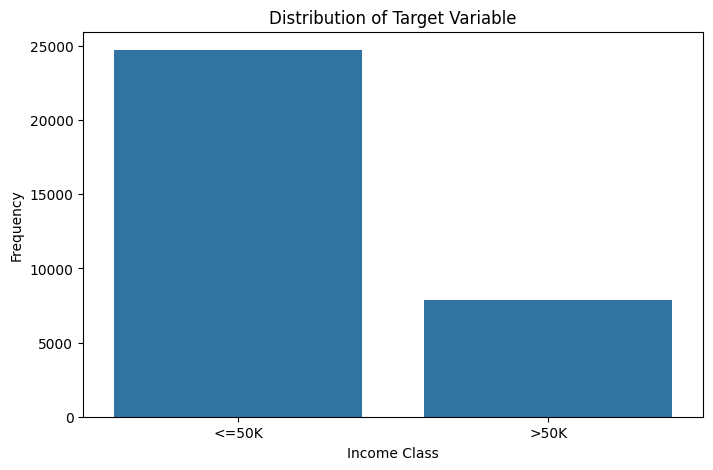

target
<=50K    24720
>50K      7841
Name: count, dtype: int64
target
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [76]:
# Plotting the distribution of the 'target' variable
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=train_data)
plt.title('Distribution of Target Variable')
plt.xlabel('Income Class')
plt.ylabel('Frequency')
plt.show()

# Printing the count of each class
print(train_data['target'].value_counts())
print(train_data['target'].value_counts(normalize=True))  # To see the percentage

**(b) Key Feature Analysis**

*Categorical Features vs Target Variable:*

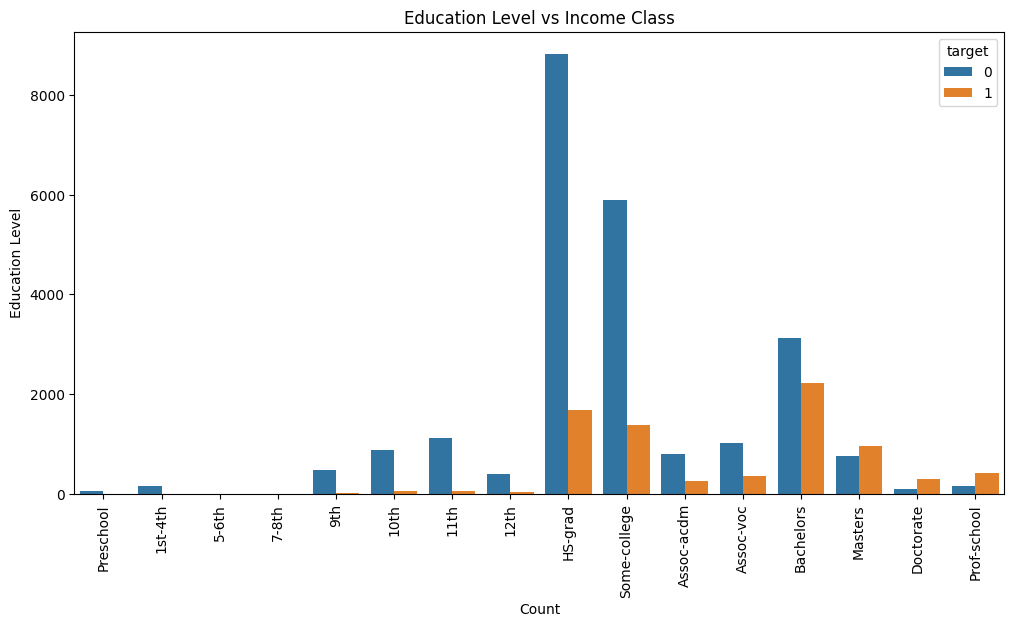

In [49]:
# Analyzing 'education' against the target
education_order = ['Preschool', '1st-4th', '5-6th', '7-8th', '9th', '10th', '11th',
                   '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc',
                   'Bachelors', 'Masters', 'Doctorate', 'Prof-school']
plt.figure(figsize=(12, 6))
sns.countplot(x='edu', hue='target', data=train_data, order=education_order)
plt.title('Education Level vs Income Class')
plt.xlabel('Count')
plt.xticks(rotation = 90)
plt.ylabel('Education Level')
plt.show()

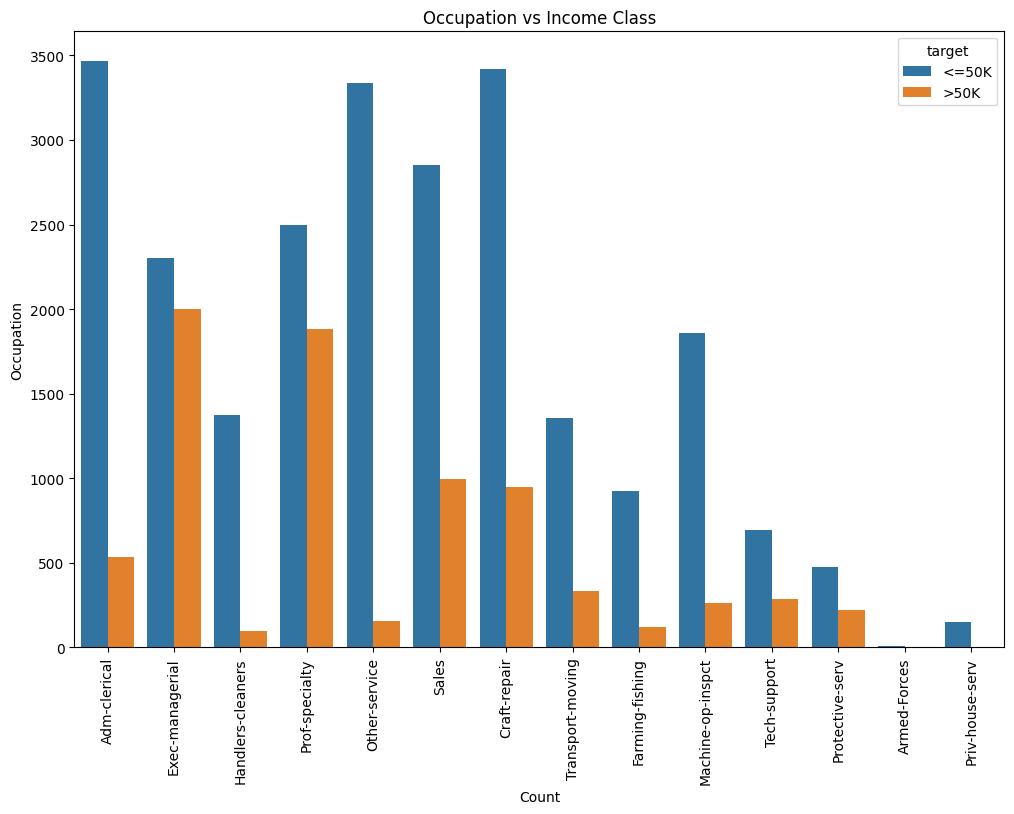

In [79]:
# Analyzing 'occupation' against the target
plt.figure(figsize=(12, 8))
sns.countplot(x='occup', hue='target', data=train_data)
plt.title('Occupation vs Income Class')
plt.xlabel('Count')
plt.xticks(rotation = 90)
plt.ylabel('Occupation')
plt.show()

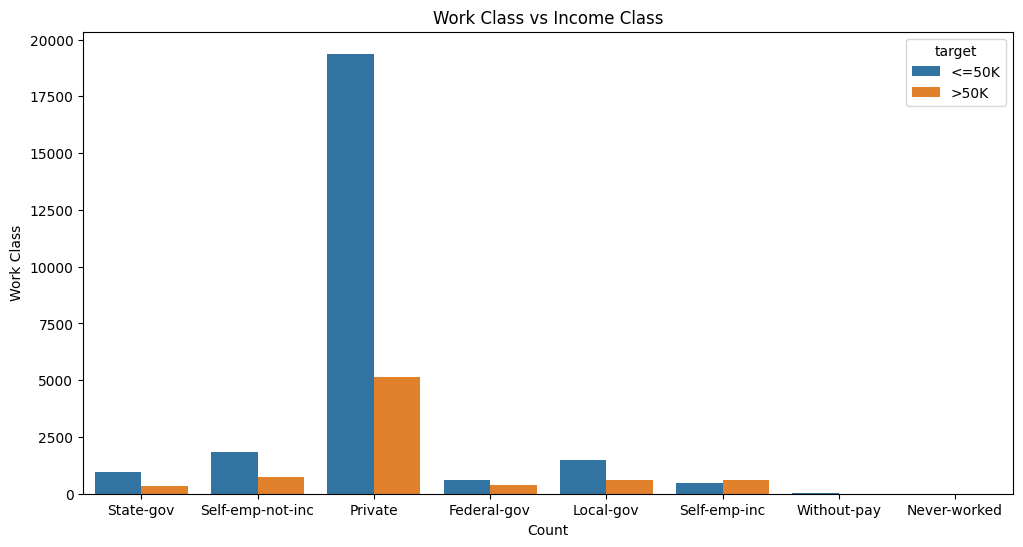

In [78]:
# Analyzing 'work class' against the target
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='target', data=train_data)
plt.title('Work Class vs Income Class')
plt.xlabel('Count')
plt.ylabel('Work Class')
plt.show()

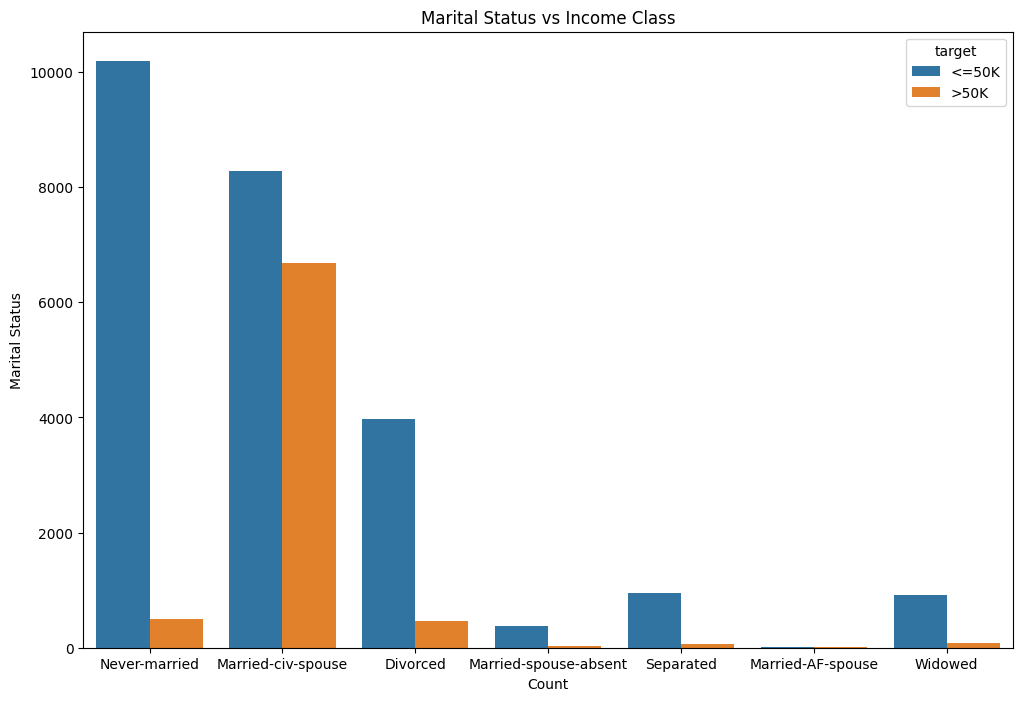

In [80]:
# Analyzing 'marital status' against the target
plt.figure(figsize=(12, 8))
sns.countplot(x='ms', hue='target', data=train_data)
plt.title('Marital Status vs Income Class')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.show()

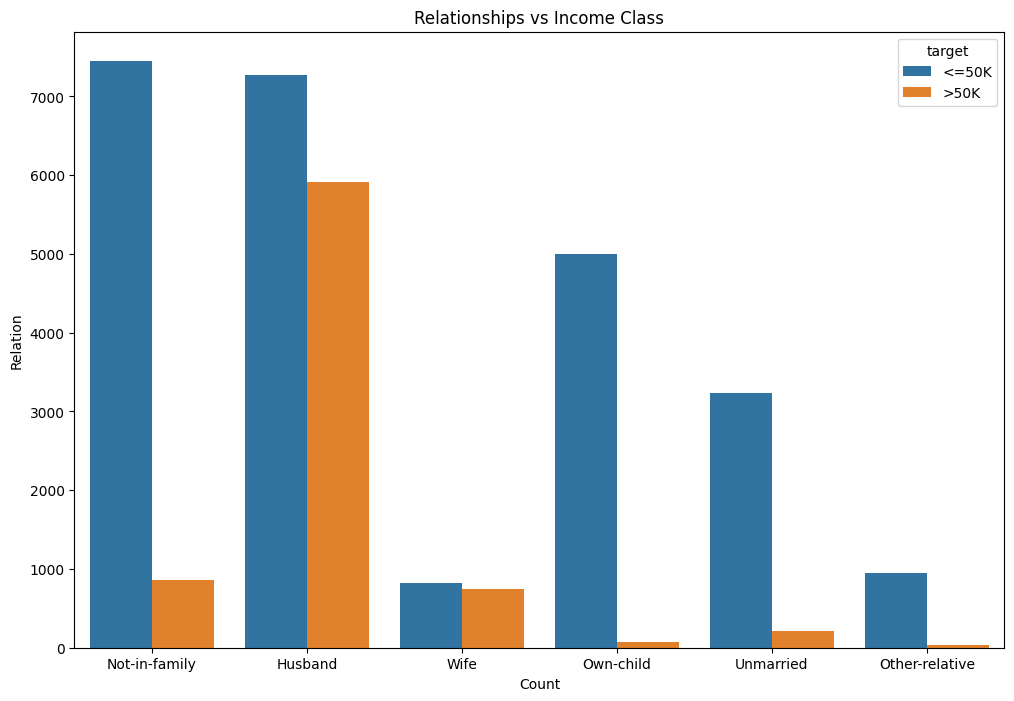

In [81]:
# Analyzing 'relationship' against the target
plt.figure(figsize=(12, 8))
sns.countplot(x='relation', hue='target', data=train_data)
plt.title('Relationships vs Income Class')
plt.xlabel('Count')
plt.ylabel('Relation')
plt.show()

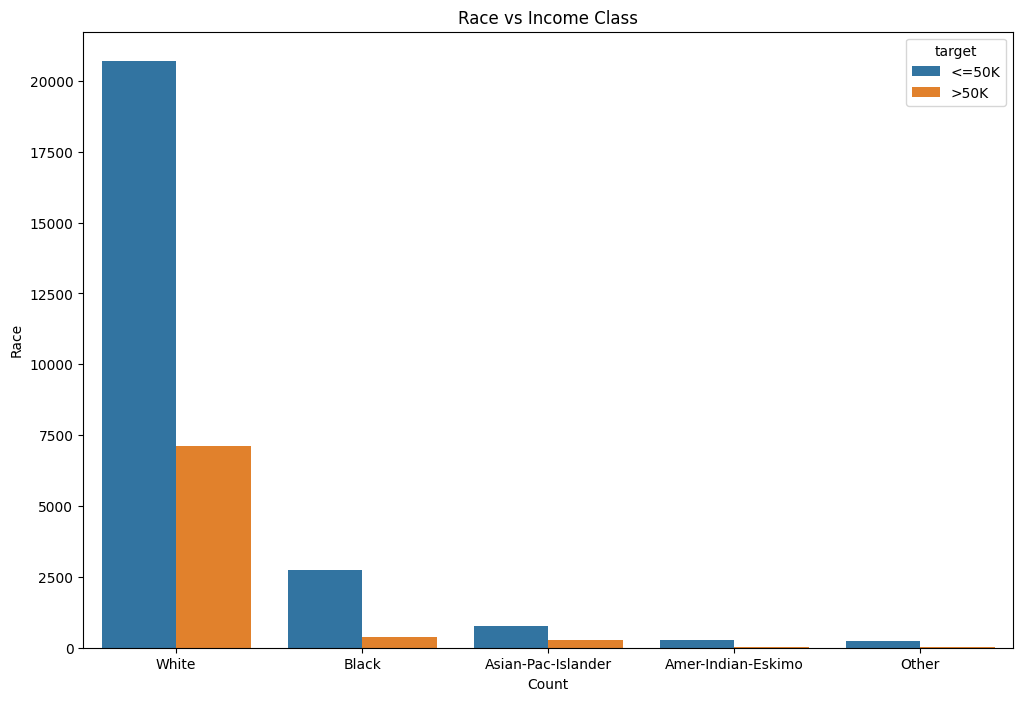

In [82]:
# Analyzing 'race' against the target
plt.figure(figsize=(12, 8))
sns.countplot(x='race', hue='target', data=train_data)
plt.title('Race vs Income Class')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

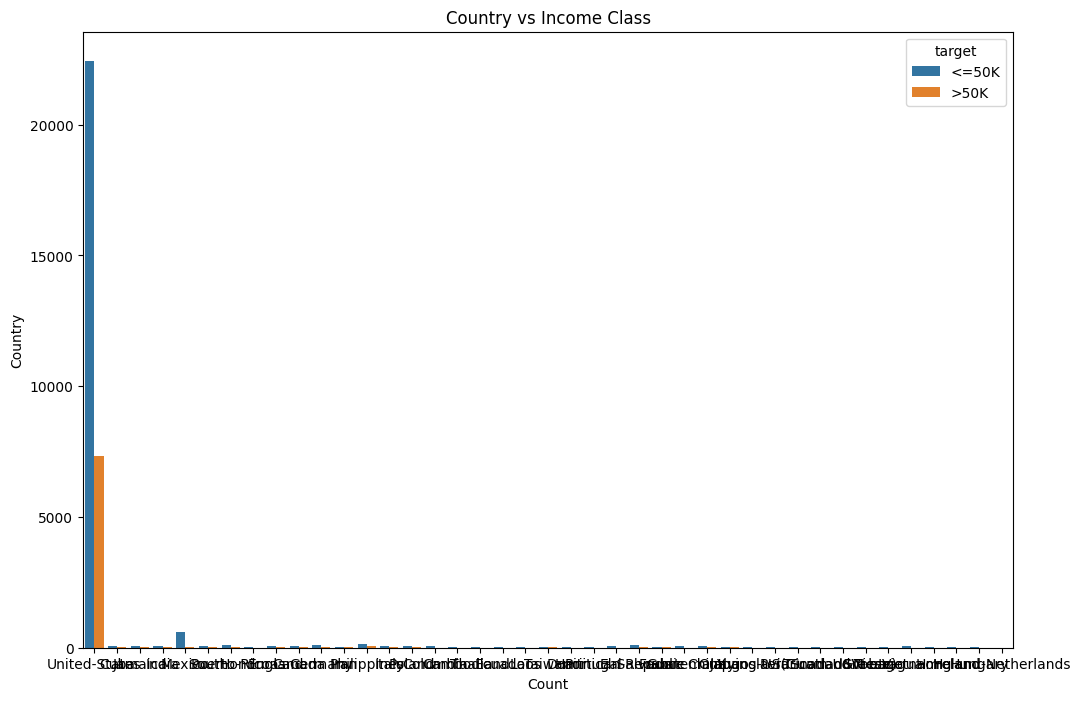

In [84]:
# Analyzing 'country' against the target
plt.figure(figsize=(12, 8))
sns.countplot(x='country',hue = 'target', data=train_data)
plt.title('Country vs Income Class')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

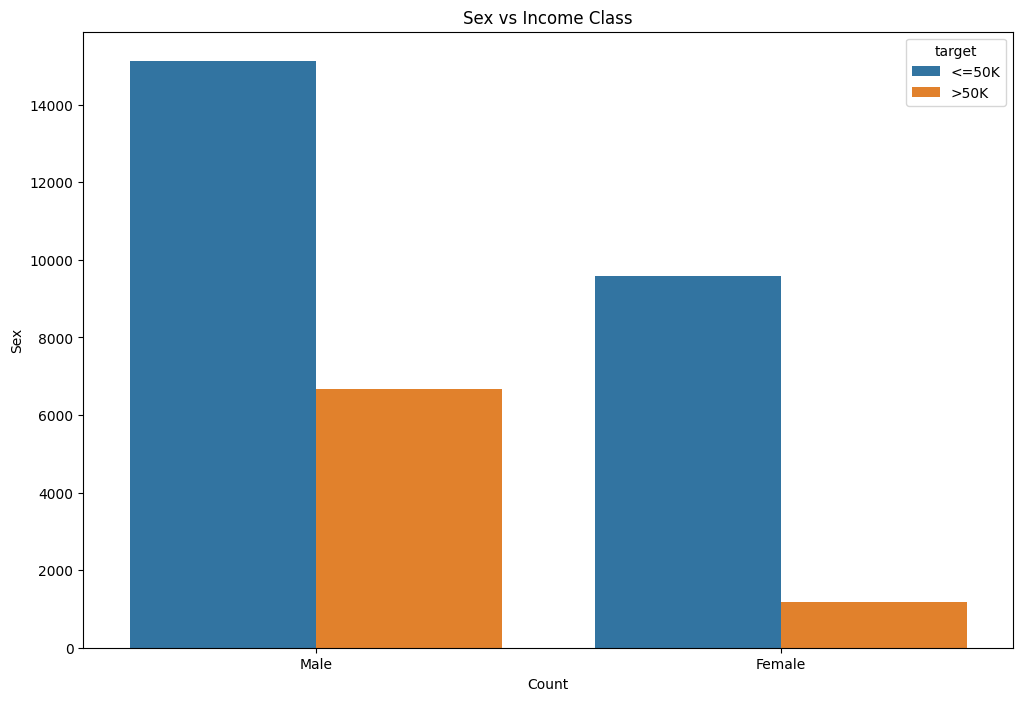

In [83]:
# Analyzing 'sex' against the target
plt.figure(figsize=(12, 8))
sns.countplot(x='sex', hue='target', data=train_data)
plt.title('Sex vs Income Class')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.show()

*Numeric Features vs. Target Variable:*

In [87]:
# age gaps w historgram
def age_group(x):
    x = abs(int(x))
    if x in range(19, 31):
      return "19 to 20s"
    if x in range(31, 41):
      return "30s"
    if x in range(41, 51):
      return "40s"
    if x in range(51, 61):
      return "50s"
    if x in range(61, 71):
      return "60s"
    else:
        return "70s+"

train_data['age_group'] = train_data['age'].apply(age_group)

Text(0.5, 1.0, 'Income of Individuals of Different Age Groups')

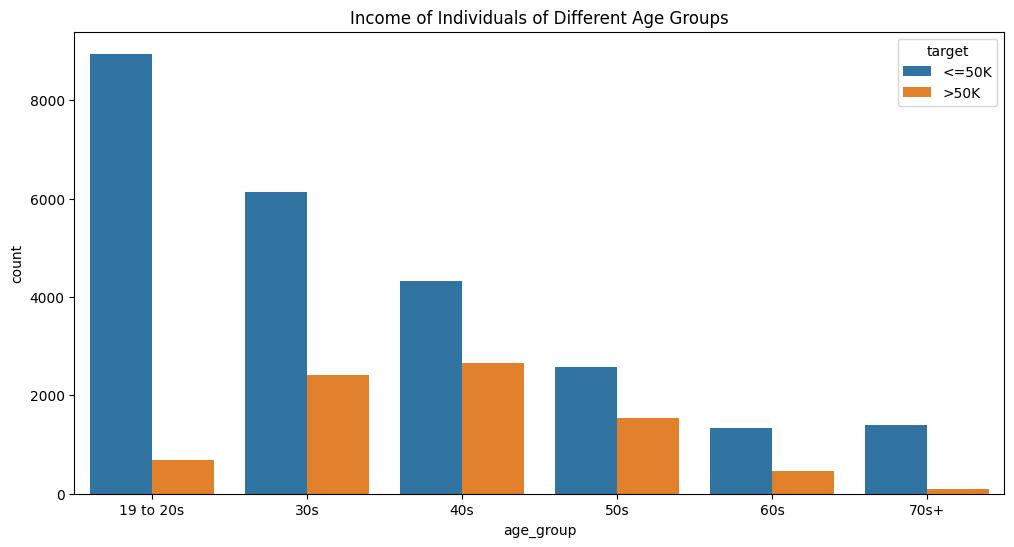

In [91]:
plt.figure(figsize=(12, 6))
order_list = ['19 to 20s', '30s', '40s', '50s', '60s', '70s+']
sns.countplot(x='age_group', hue='target', data=train_data, order = order_list)
plt.title('Income of Individuals of Different Age Groups')

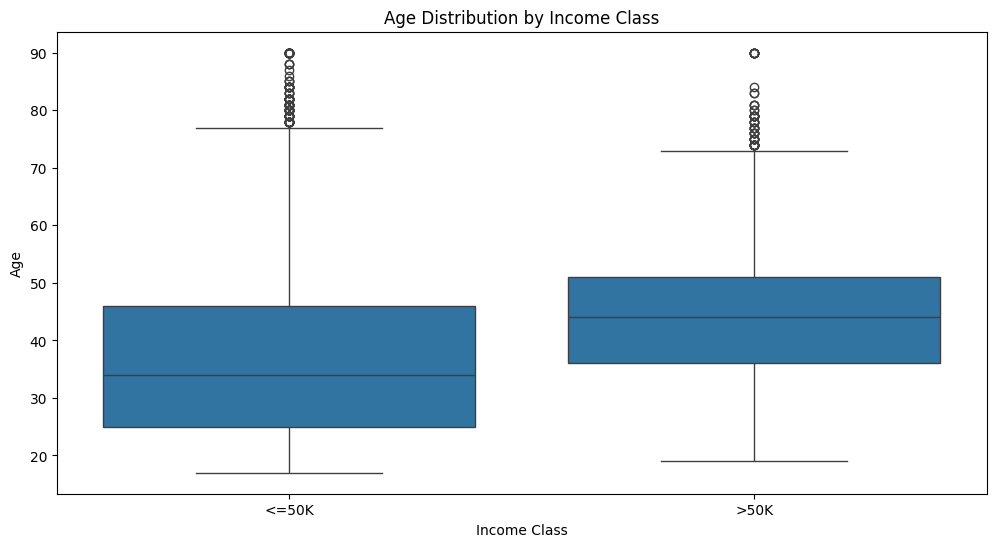

In [42]:
# Distribution of age across income levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='age', data=train_data)
plt.title('Age Distribution by Income Class')
plt.xlabel('Income Class')
plt.ylabel('Age')
plt.show()

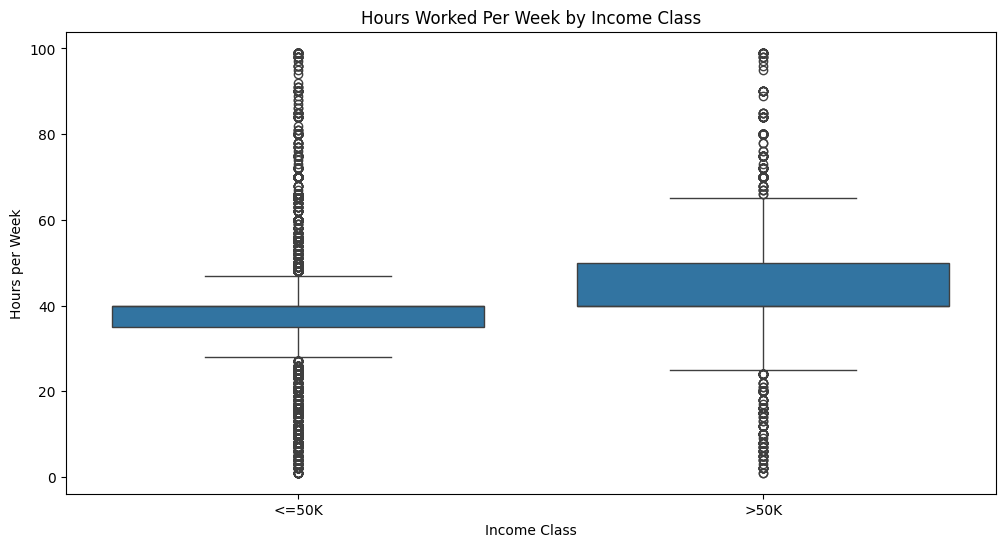

In [43]:
# Analyzing hours per week across income classes
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='hpw', data=train_data)
plt.title('Hours Worked Per Week by Income Class')
plt.xlabel('Income Class')
plt.ylabel('Hours per Week')
plt.show()

*Additional Analysis - Correlation of Numerical Features*

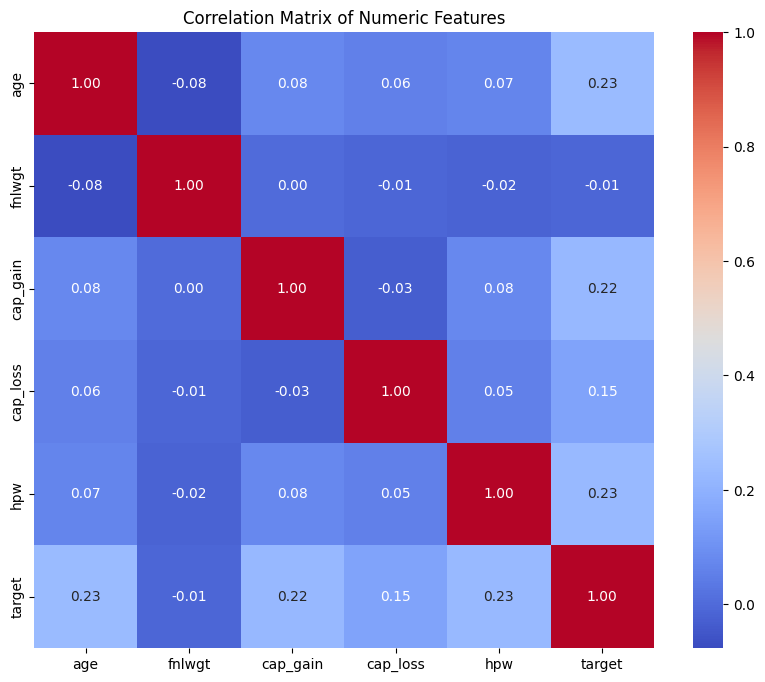

In [44]:
# method 1: excluding non-numeric columns
train_data['target'] = train_data['target'].map({'<=50K': 0, '>50K': 1})
df = train_data.select_dtypes(include=[np.number])
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**Categorical Data Encoding and Scaling**

Next, we want to scale and normalize the training set. Scanling and normalizing are essential when the training data contains features that vary in magnitured, units, and range. These steps help ensure that each feature contributes equally to the analysis and improves the performance of the model.
*  **Scaling**: Adjusts the range of your data, typically to have the mean of 0 and a standard deviation of 1 (Standard Scaling) or to fit within a specific range like [0,1].
* **Normalizing**: Adjusts the data to have a norm of 1 which is useful for data with varying units or scales.

In [ ]:
# grouping smaller groups into one
train_data['edu'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th',
                                 '9th', '10th', '11th', '12th'], 'School', inplace = True)
train_data['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
                   'Other', inplace = True)
test_data['edu'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th',
                                 '9th', '10th', '11th', '12th'], 'School', inplace = True)
test_data['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
                   'Other', inplace = True)
test_data['target'] = test_data['target'].map({'<=50K': 0, '>50K': 1})

In [ ]:
# label encoding all categorical columns
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','edu', 'ms', 'occup', 'relation', 'race', 'sex','country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(train_data[col])
    train_data[col] = label_encoder.transform(train_data[col])
    label_encoder.fit(test_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

In [ ]:
# training data
X = train_data.drop('target', axis = 1)
y = train_data['target']

# test data
X_test = test_data.drop('target', axis = 1)
y_test = test_data['target']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(X))
x_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.030671,2.624298,-1.063611,-1.146982,0.921634,-1.480587,-0.277805,0.413020,0.703071,0.148453,-0.21666,-0.035429,0.26137
1,0.837109,1.721100,-1.008707,-1.146982,-0.406212,-0.735177,-0.900181,0.413020,0.703071,-0.145920,-0.21666,-2.222153,0.26137
2,-0.042642,-0.085296,0.245079,-0.320568,-1.734058,-0.238237,-0.277805,0.413020,0.703071,-0.145920,-0.21666,-0.035429,0.26137
3,1.057047,-0.085296,0.425801,0.919052,-0.406212,-0.238237,-0.900181,-2.421192,0.703071,-0.145920,-0.21666,-0.035429,0.26137
4,-0.775768,-0.085296,1.408176,-1.146982,-0.406212,0.755643,2.211698,-2.421192,-1.422331,-0.145920,-0.21666,-0.035429,-5.35294
